In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import folium
%matplotlib inline

In [2]:
police_calls = pd.read_csv('../data/police_calls_2018.csv')

In [3]:
police_calls.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [4]:
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [5]:
police_calls.shape

(718021, 18)

In [6]:
police_calls.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Block', 'Street Name', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude',
       'Longitude', 'geometry', 'zipcode', 'PO'],
      dtype='object')

In [7]:
police_calls.drop(columns = ['Event Number','Complaint Number','Block','Street Name','geometry'])

,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Zone,Latitude,Longitude,zipcode,PO
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718016,07/16/2018 02:51:29 PM,A,93,Traffic Violation,9,SUBJECT WARNED,8F62,S,31,35.993,-86.685,37027,BRENTWOOD
718017,07/27/2018 01:24:55 AM,C,70,Burglary - Residence,13,FALSE CALL,317C,S,31,35.994,-86.685,37027,BRENTWOOD
718018,08/29/2018 09:11:36 AM,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,3T73,S,31,35.994,-86.685,37027,BRENTWOOD
718019,08/08/2018 10:15:20 AM,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,NaN,W,25,36.094,-87.038,37143,PEGRAM


In [8]:
police_calls = police_calls.drop(columns = ['Event Number','Complaint Number','Block','Street Name','geometry'])

In [9]:
police_calls.columns = ['call_time','shift','tencode','tencode_desc','disposition','disposition_desc','unit_dispatched','sector','zone','lat','lng','zipcode','po']

In [10]:
police_calls.head(1)

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.21,-86.6,37076,HERMITAGE


In [11]:
police_calls['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

In [12]:
police_calls = police_calls.loc[~police_calls.disposition_desc.isna()]

In [13]:
police_calls = police_calls.loc[~police_calls.disposition_desc.isin(['DISREGARD / SIGNAL 9','NO RESPONSE'])]

In [14]:
police_calls.shape

(624841, 13)

In [15]:
police_calls['tencode_desc'].value_counts()

Business Check                                 154763
Traffic Violation                              141283
Want Officer for Investigation / Assistance    100465
Administrative/Special Assignment               34094
Community Policing Activity                     34001
Suspicious Person                               26602
Disorderly Person                               22120
Vehicle Accident - Property Damage              21624
Safety Hazard                                   18845
Theft                                           11656
Burglary - Non-Residence                        11300
Burglary - Residence                            10081
Vehicle Blocking Right of Way                    6781
Investigate 911 Hang-Up Call                     6017
Vehicle Accident - Personal Injury               3751
Fight / Assault                                  3273
Fixed Post                                       2635
Meal Break                                       2498
Shots Fired                 

In [16]:
type_counts = police_calls['tencode_desc'].value_counts()
type_counts.head()

Business Check                                 154763
Traffic Violation                              141283
Want Officer for Investigation / Assistance    100465
Administrative/Special Assignment               34094
Community Policing Activity                     34001
Name: tencode_desc, dtype: int64

In [17]:
type(type_counts)

pandas.core.series.Series

In [18]:
type_counts.index

Index(['Business Check', 'Traffic Violation',
       'Want Officer for Investigation / Assistance',
       'Administrative/Special Assignment', 'Community Policing Activity',
       'Suspicious Person', 'Disorderly Person',
       'Vehicle Accident - Property Damage', 'Safety Hazard', 'Theft',
       'Burglary - Non-Residence', 'Burglary - Residence',
       'Vehicle Blocking Right of Way', 'Investigate 911 Hang-Up Call',
       'Vehicle Accident - Personal Injury', 'Fight / Assault', 'Fixed Post',
       'Meal Break', 'Shots Fired', 'Transport Prisoner / Suspect',
       'Intoxicated Person', 'Missing Person', 'Dangerous / Injured Animal',
       'Suicidal Person', 'Person with Weapon', 'Holdup / Robbery',
       'Person Indecently Exposed', 'Escort / Convoy', 'Person Screaming',
       'Prowler', 'Mentally ILL Person', 'Fire', 'Personal Relief',
       'Corpse / D. O. A.', 'Shooting', 'Hazardous Liquid / Gas Leak',
       'Kidnapping', 'Cutting / Stabbing', 'Gang Activity', 'Explosio

In [19]:
type_counts = type_counts.reset_index()
type_counts

,index,tencode_desc
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001
5,Suspicious Person,26602
6,Disorderly Person,22120
7,Vehicle Accident - Property Damage,21624
8,Safety Hazard,18845
9,Theft,11656


In [20]:
type_counts.columns = ['tencode','tencode_count']
type_counts.head()

,tencode,tencode_count
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001


<AxesSubplot:ylabel='tencode'>

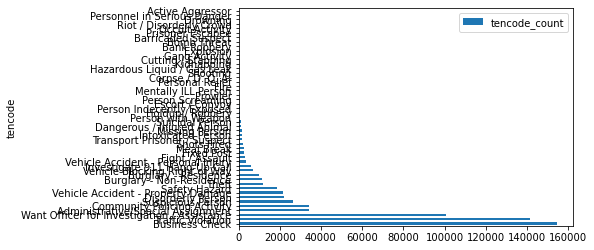

In [21]:
type_counts.plot(kind = 'barh',
                x = 'tencode',
                y = 'tencode_count')

Text(0.5, 1.0, 'Frequency of Tencodes')

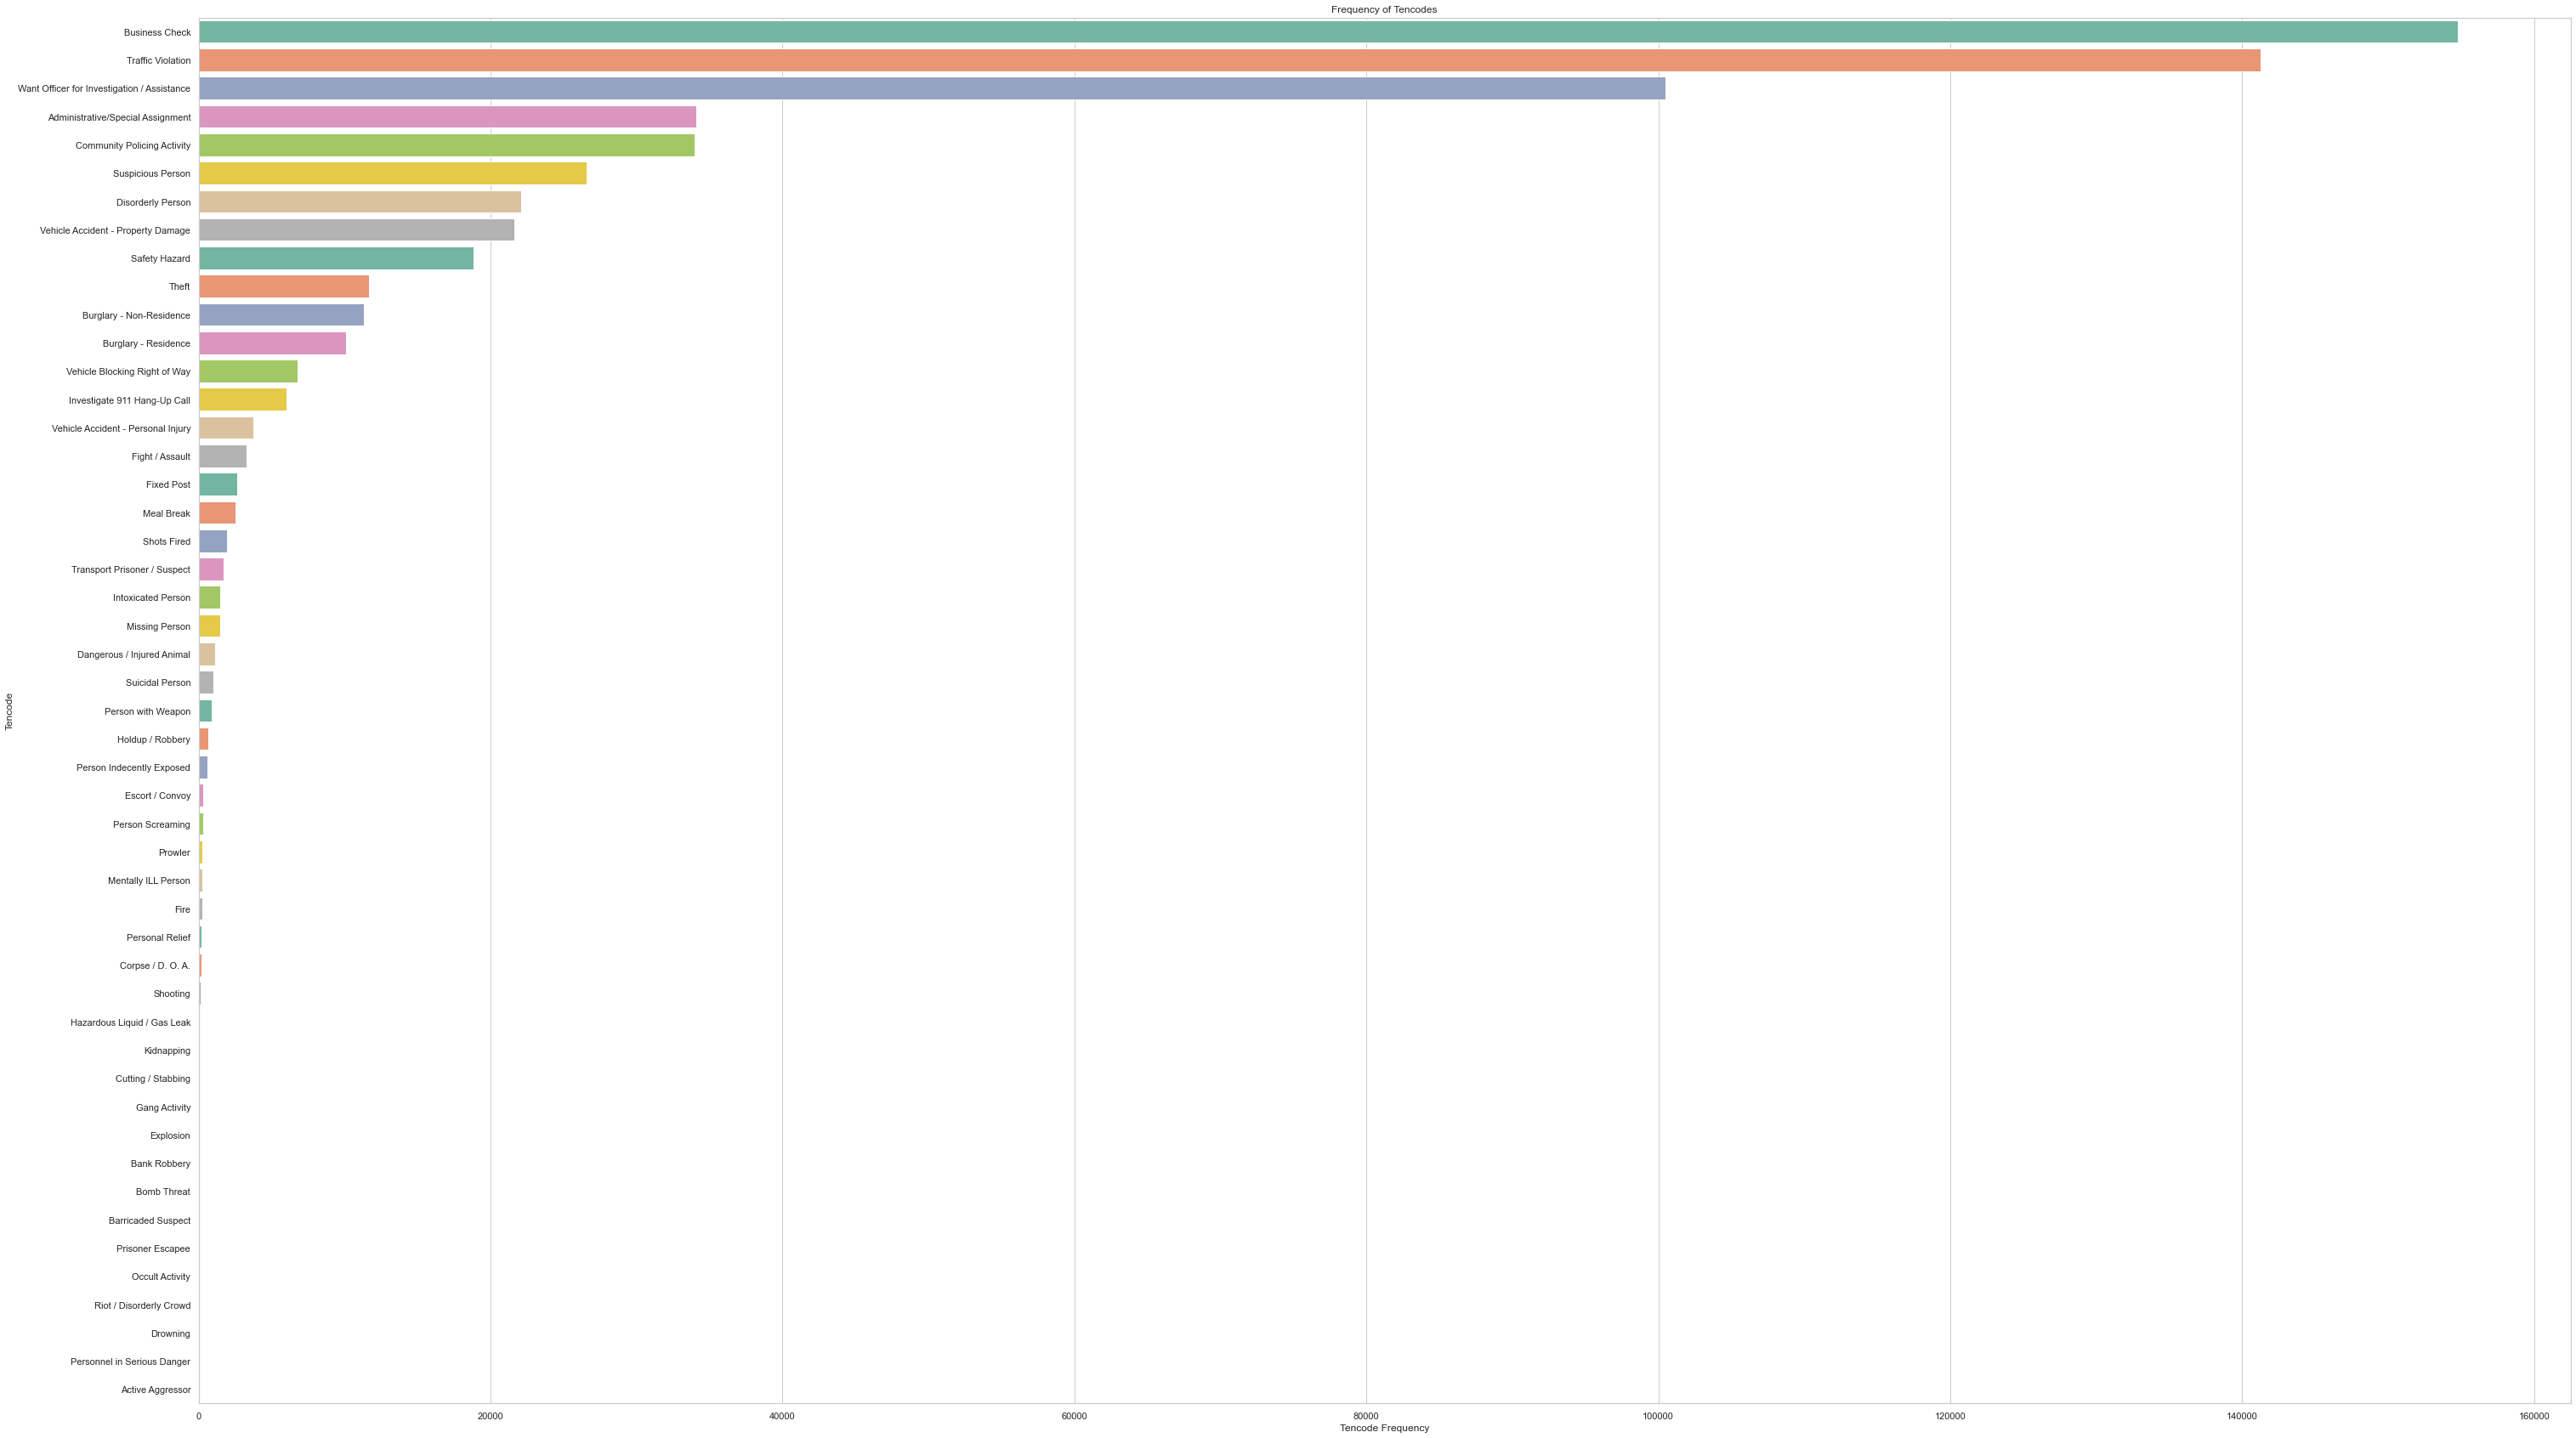

In [22]:
plt.figure(figsize = (50, 30))
sns.set(style="whitegrid")
sns.barplot(x = 'tencode_count',
           y = 'tencode',
           data = type_counts,
           palette = 'Set2')
plt.xlabel('Tencode Frequency')
plt.ylabel('Tencode')
plt.title('Frequency of Tencodes')

In [23]:
police_calls['zipcode'] = police_calls['zipcode'].astype(str)

In [24]:
type_counts = police_calls['zipcode'].value_counts()

In [25]:
type_counts = type_counts.reset_index()

In [26]:
type_counts.columns = ['zipcode','number_of_calls']
type_counts.head()

,zipcode,number_of_calls
0,37203,61962
1,37209,52248
2,37207,48750
3,37211,47528
4,37115,39879


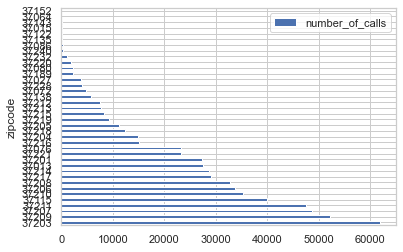

In [27]:
type_counts.plot(kind = 'barh',
                x = 'zipcode',
                y= 'number_of_calls');

Text(0.5, 1.0, 'Zipcode Call Frequency')

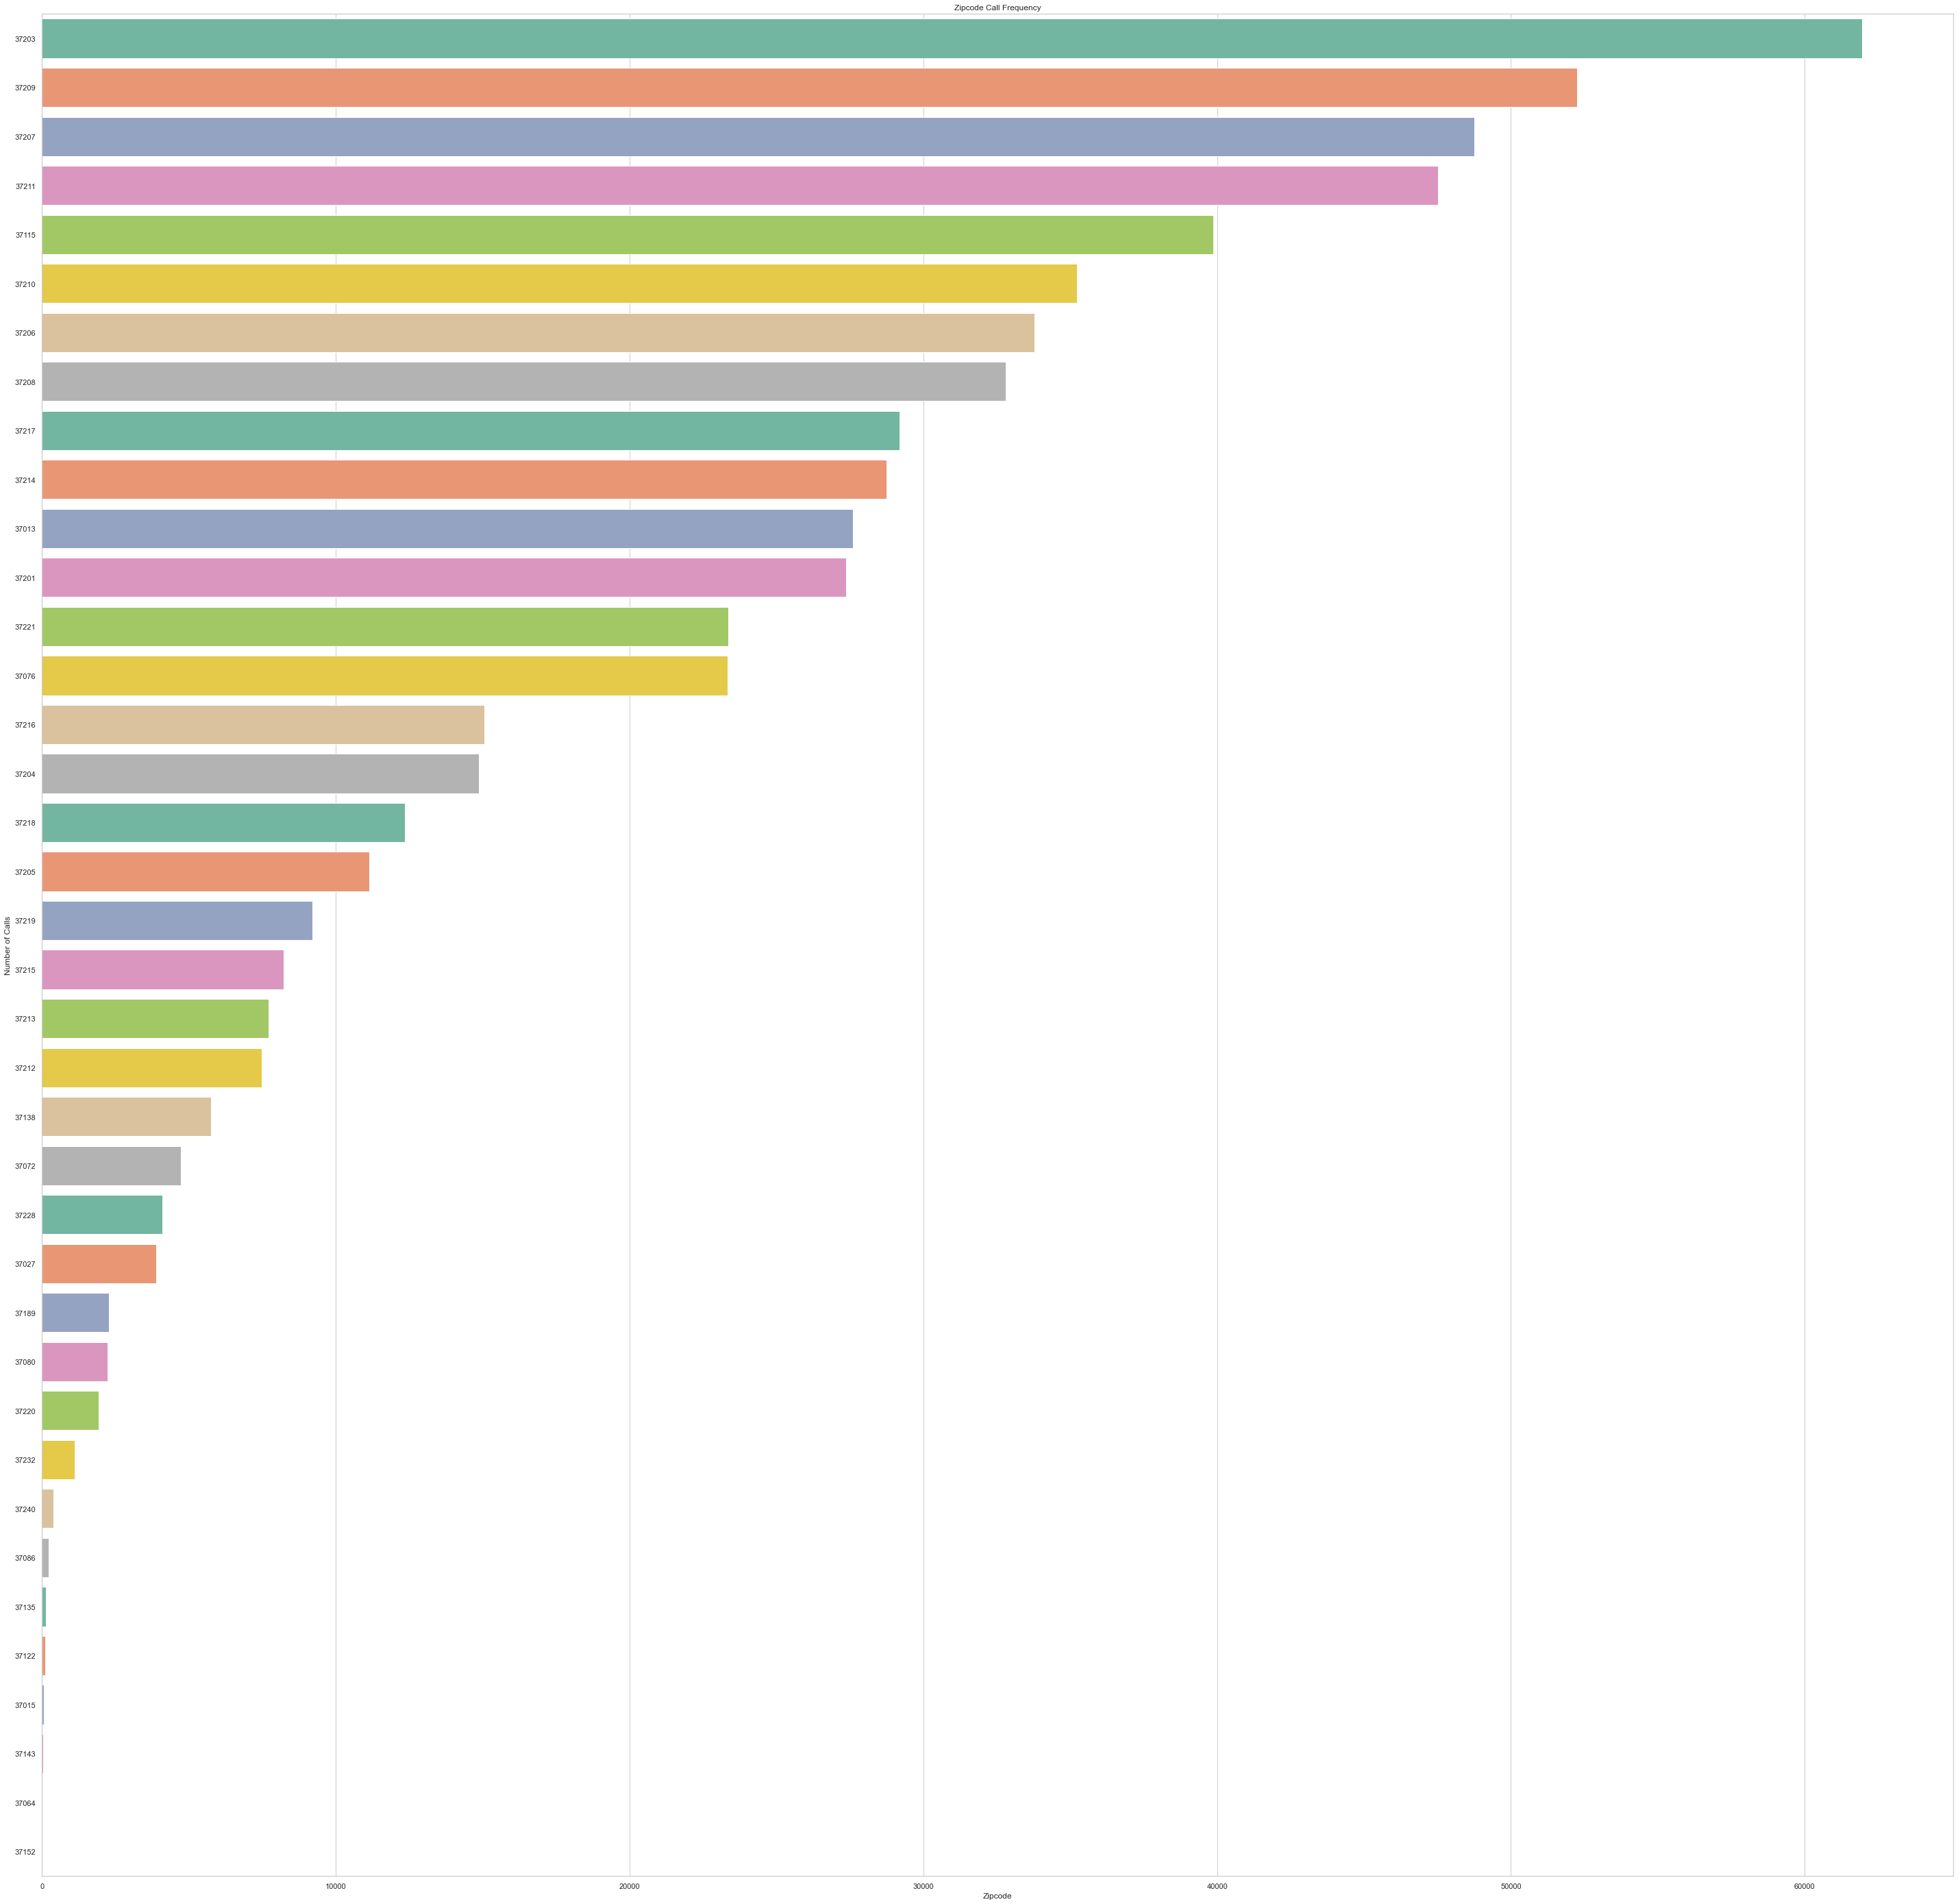

In [28]:
plt.figure(figsize = (50, 50))
sns.set(style="whitegrid")
sns.barplot(x = 'number_of_calls',
           y = 'zipcode',
           data = type_counts,
           palette = 'Set2')
plt.xlabel('Zipcode')
plt.ylabel('Number of Calls')
plt.title('Zipcode Call Frequency')

In [29]:
police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [30]:
police_calls[police_calls['tencode_desc']=='Community Policing Activity']['zipcode'].mode()

0    37209
dtype: object

In [31]:
police_calls['zipcode'].mode()

0    37203
dtype: object

In [32]:
police_calls['call_time'] = pd.to_datetime(police_calls['call_time'], 
                                          format = '%m/%d/%Y %I:%M:%S %p')

In [33]:
police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,2018-02-16 22:16:00,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,2018-02-16 17:58:00,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [34]:
police_calls['month'] = police_calls['call_time'].dt.month
police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po,month
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE,2
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE,2
2,2018-02-16 22:16:00,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE,2
3,2018-02-16 17:58:00,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE,2
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE,2


In [35]:
police_calls['month'].mode()

0    1
dtype: int64

In [36]:
police_calls['month'].value_counts()

1    85094
3    79892
5    74718
8    73181
6    73098
2    72413
4    65953
7    57558
9    42934
Name: month, dtype: int64

In [37]:
#alternate way to get most frequent value
police_calls['month'].value_counts().idxmax()

1

In [38]:
#least frequent value
police_calls['month'].value_counts().idxmin()

9

In [39]:
police_calls['call_time'].dt.day_name().mode()

0    Tuesday
dtype: object

In [40]:
police_calls['call_time'].dt.day_name().value_counts().idxmin()

'Sunday'

In [41]:
hub = pd.read_csv('../data/hubNashville_2018.csv')

In [42]:
hub.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345


In [43]:
hub.shape

(81166, 11)

In [44]:
hub.columns = ['request_id','status','request_type','subrequest_type','add_subrequest_type','opened','closed','origin','zipcode','lat','lng']
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345


In [45]:
hub = hub.loc[~hub.closed.isna()]
hub.shape

(80866, 11)

In [46]:
hub['closed'] = pd.to_datetime(hub['closed'], 
                                          format = '%m/%d/%Y %I:%M:%S %p')

In [47]:
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,2018-02-12 15:48:14,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,2018-02-12 15:49:13,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,2018-02-07 17:04:33,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,2018-02-27 21:06:16,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,2018-02-08 15:01:50,Phone,37210.0,36.154836,-86.763345


In [48]:
#not sure why opened needed to omit format line to work as above with closed
hub['opened'] = pd.to_datetime(hub['opened'])

In [49]:
hub['resolution_time'] = hub['closed'] - hub['opened']

In [50]:
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,2018-02-12 15:48:14,Phone,37115.0,36.296917,-86.699162,0 days 01:47:54
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,2018-02-12 15:49:13,Phone,37076.0,36.215403,-86.588513,0 days 01:48:52
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,2018-02-07 17:04:33,Phone,37076.0,36.187902,-86.607286,4 days 19:46:18
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,2018-02-27 21:06:16,hubNashville Community,37203.0,36.153761,-86.788745,3 days 21:39:09
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,2018-02-08 15:01:50,Phone,37210.0,36.154836,-86.763345,0 days 01:01:46


In [51]:
hub = hub.sort_values(by='request_type')
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time
3943,67511,Closed,Education & Libraries,MNPS – Facilities,MNPS & Facilities,2018-05-14 20:16:06,2020-06-22 14:10:24,Phone,37216.0,36.218290,-86.716660,769 days 17:54:18
5831,61470,Closed,Education & Libraries,Community Education,Community Education,2018-04-18 23:23:56,2020-06-22 14:29:17,hubNashville Community,37211.0,36.084269,-86.718508,795 days 15:05:21
37064,79213,Closed,Education & Libraries,School Locations,School Locations,2018-06-29 13:36:45,2020-06-22 14:21:43,Mayor's Office,37218.0,36.192293,-86.832458,724 days 00:44:58
5832,67485,Closed,Education & Libraries,Library Locations,Library Locations,2018-05-14 19:25:04,2020-06-22 15:15:48,Phone,37206.0,36.179090,-86.750180,769 days 19:50:44
3944,65960,Closed,Education & Libraries,MNPS – Facilities,MNPS & Facilities,2018-05-08 13:00:47,2020-06-22 14:09:55,hubNashville Community,37221.0,36.070720,-86.935920,776 days 01:09:08


In [52]:
hub.loc[hub['resolution_time'] > '365 days']

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time
3943,67511,Closed,Education & Libraries,MNPS – Facilities,MNPS & Facilities,2018-05-14 20:16:06,2020-06-22 14:10:24,Phone,37216.0,36.218290,-86.716660,769 days 17:54:18
5831,61470,Closed,Education & Libraries,Community Education,Community Education,2018-04-18 23:23:56,2020-06-22 14:29:17,hubNashville Community,37211.0,36.084269,-86.718508,795 days 15:05:21
37064,79213,Closed,Education & Libraries,School Locations,School Locations,2018-06-29 13:36:45,2020-06-22 14:21:43,Mayor's Office,37218.0,36.192293,-86.832458,724 days 00:44:58
5832,67485,Closed,Education & Libraries,Library Locations,Library Locations,2018-05-14 19:25:04,2020-06-22 15:15:48,Phone,37206.0,36.179090,-86.750180,769 days 19:50:44
3944,65960,Closed,Education & Libraries,MNPS – Facilities,MNPS & Facilities,2018-05-08 13:00:47,2020-06-22 14:09:55,hubNashville Community,37221.0,36.070720,-86.935920,776 days 01:09:08
...,...,...,...,...,...,...,...,...,...,...,...,...
33413,107142,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-10-08 14:53:39,2019-12-06 17:18:58,hubNashville Community,37209.0,36.176828,-86.895992,424 days 02:25:19
30163,107809,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-10-09 21:31:53,2019-12-06 17:19:13,hubNashville Community,37203.0,36.157954,-86.808333,422 days 19:47:20
14766,116634,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-11-14 16:58:55,2019-12-06 17:18:03,Phone,37221.0,36.079720,-86.953963,387 days 00:19:08
39983,84367,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-07-19 21:56:01,2019-12-06 17:18:31,Phone,37210.0,36.132337,-86.755466,504 days 19:22:30


In [53]:
slow_to_resolve = hub.loc[hub['resolution_time'] > '365 days']
slow_to_resolve.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time
3943,67511,Closed,Education & Libraries,MNPS – Facilities,MNPS & Facilities,2018-05-14 20:16:06,2020-06-22 14:10:24,Phone,37216.0,36.218290,-86.716660,769 days 17:54:18
5831,61470,Closed,Education & Libraries,Community Education,Community Education,2018-04-18 23:23:56,2020-06-22 14:29:17,hubNashville Community,37211.0,36.084269,-86.718508,795 days 15:05:21
37064,79213,Closed,Education & Libraries,School Locations,School Locations,2018-06-29 13:36:45,2020-06-22 14:21:43,Mayor's Office,37218.0,36.192293,-86.832458,724 days 00:44:58
5832,67485,Closed,Education & Libraries,Library Locations,Library Locations,2018-05-14 19:25:04,2020-06-22 15:15:48,Phone,37206.0,36.179090,-86.750180,769 days 19:50:44
3944,65960,Closed,Education & Libraries,MNPS – Facilities,MNPS & Facilities,2018-05-08 13:00:47,2020-06-22 14:09:55,hubNashville Community,37221.0,36.070720,-86.935920,776 days 01:09:08


In [54]:
#or slow_to_resolve.request_type.value_counts()
slow_to_resolve['request_type'].mode()

0    Streets, Roads & Sidewalks
dtype: object

In [55]:
hub['resolution_time_hours'] = hub['resolution_time']/pd.Timedelta(hours=1)

In [56]:
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time,resolution_time_hours
3943,67511,Closed,Education & Libraries,MNPS – Facilities,MNPS & Facilities,2018-05-14 20:16:06,2020-06-22 14:10:24,Phone,37216.0,36.218290,-86.716660,769 days 17:54:18,18473.905000
5831,61470,Closed,Education & Libraries,Community Education,Community Education,2018-04-18 23:23:56,2020-06-22 14:29:17,hubNashville Community,37211.0,36.084269,-86.718508,795 days 15:05:21,19095.089167
37064,79213,Closed,Education & Libraries,School Locations,School Locations,2018-06-29 13:36:45,2020-06-22 14:21:43,Mayor's Office,37218.0,36.192293,-86.832458,724 days 00:44:58,17376.749444
5832,67485,Closed,Education & Libraries,Library Locations,Library Locations,2018-05-14 19:25:04,2020-06-22 15:15:48,Phone,37206.0,36.179090,-86.750180,769 days 19:50:44,18475.845556
3944,65960,Closed,Education & Libraries,MNPS – Facilities,MNPS & Facilities,2018-05-08 13:00:47,2020-06-22 14:09:55,hubNashville Community,37221.0,36.070720,-86.935920,776 days 01:09:08,18625.152222


In [57]:
hub['resolution_time_hours'].describe()

count    80866.000000
mean       352.098805
std       1038.193432
min          0.000000
25%         25.973958
50%         73.271944
75%        203.533333
max      22514.371111
Name: resolution_time_hours, dtype: float64

<AxesSubplot:xlabel='resolution_time_hours', ylabel='request_type'>

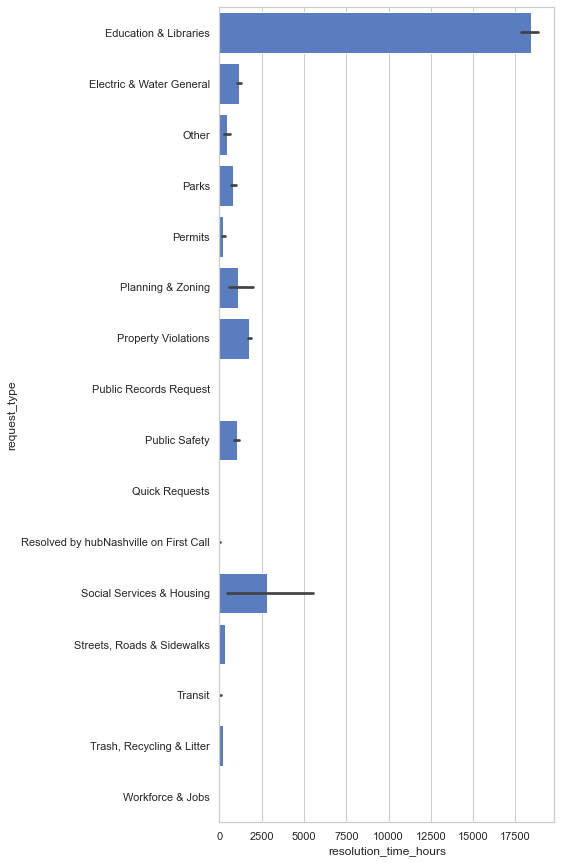

In [58]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))


sns.set_color_codes("muted")
sns.barplot(x="resolution_time_hours", y="request_type", data=hub,
            label="", color="b")


In [59]:
streets_roads_sidewalks = hub.loc[hub['request_type'] == 'Streets, Roads & Sidewalks']

In [60]:
streets_roads_sidewalks

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time,resolution_time_hours
44346,93805,Closed,"Streets, Roads & Sidewalks",Tree Maintenance on right of way,Tree is dead and needs removal,2018-08-29 15:15:00,2018-08-30 15:14:00,Phone,37207.0,36.195150,-86.767480,0 days 23:59:00,23.983333
44275,88453,Closed,"Streets, Roads & Sidewalks",Tree Maintenance on right of way,Tree is dead and needs removal,2018-08-07 11:08:00,2018-08-08 04:12:00,Phone,37220.0,36.088600,-86.799520,0 days 17:04:00,17.066667
44276,83505,Closed,"Streets, Roads & Sidewalks",Dead Animal Pickup,Dead Animal Pickup,2018-07-17 14:16:40,2018-07-17 20:18:02,Phone,37207.0,36.207237,-86.762840,0 days 06:01:22,6.022778
44335,86213,Closed,"Streets, Roads & Sidewalks",Driveway Transition/Drop Off,Driveway Transition/Drop Off,2018-07-27 17:47:10,2018-08-29 20:04:42,Phone,37214.0,36.154412,-86.672866,33 days 02:17:32,794.292222
44278,83187,Closed,"Streets, Roads & Sidewalks",Overgrowth on right of way,Roadway,2018-07-16 09:17:00,2018-07-19 11:15:00,Phone,37013.0,36.060080,-86.671350,3 days 01:58:00,73.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,2018-02-27 21:06:16,hubNashville Community,37203.0,36.153761,-86.788745,3 days 21:39:09,93.652500
24797,104839,Closed,"Streets, Roads & Sidewalks",Overgrowth on right of way,Roadway,2018-10-01 13:36:00,2018-10-04 15:14:00,Phone,37210.0,36.121310,-86.733020,3 days 01:38:00,73.633333
230,43855,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-05 14:00:33,2018-02-05 18:35:54,Phone,37013.0,35.992407,-86.647249,0 days 04:35:21,4.589167
12108,126852,Closed,"Streets, Roads & Sidewalks",Damaged Sign,Damaged Sign,2018-12-31 19:45:44,2019-01-02 21:07:50,Phone,37208.0,36.173338,-86.808528,2 days 01:22:06,49.368333


In [61]:
streets_roads_sidewalks.groupby('zipcode')['resolution_time_hours'].median()

zipcode
37013.0     39.846944
37015.0     47.844167
37027.0     42.151667
37064.0     53.966944
37072.0     46.350000
37076.0     44.170556
37080.0     69.516667
37086.0     43.233333
37115.0     29.608333
37122.0     30.214306
37135.0    111.916667
37138.0     42.031389
37143.0     40.461389
37152.0      1.766667
37189.0     44.116667
37201.0     48.730833
37203.0     51.159861
37204.0     69.791667
37205.0     70.208333
37206.0     90.866667
37207.0     46.075000
37208.0     80.283333
37209.0     55.883333
37210.0     47.966667
37211.0     36.233333
37212.0     85.205694
37213.0     43.048333
37214.0     24.200000
37215.0     51.525833
37216.0     49.215000
37217.0     38.233333
37218.0     44.943194
37219.0     70.983333
37220.0     42.483333
37221.0     48.658333
37228.0     42.633333
37232.0     40.416667
Name: resolution_time_hours, dtype: float64

In [62]:
streets_median = streets_roads_sidewalks.groupby('zipcode')['resolution_time_hours'].median()

In [63]:
streets_median = streets_median.reset_index()

In [64]:
streets_median

,zipcode,resolution_time_hours
0,37013.0,39.846944
1,37015.0,47.844167
2,37027.0,42.151667
3,37064.0,53.966944
4,37072.0,46.350000
5,37076.0,44.170556
6,37080.0,69.516667
7,37086.0,43.233333
8,37115.0,29.608333
9,37122.0,30.214306


In [138]:
conn = sql.connect('../data/metro_survey.db')
cur = conn.cursor()

In [139]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
available_tables = (cur.fetchall())
print(available_tables)

[('codes',), ('equality_and_access',), ('general_services',), ('info',), ('overall',), ('recreation',), ('safety',), ('transportation',)]


In [140]:
#instructor did SELECT * FROM safety JOIN info On safety.id = info.id, also can do an alias by saying saftey AS s to make it easier to pull columns later 
query = '''
SELECT *
FROM safety
JOIN info
ON safety.id = info.id
'''

safety_exp = pd.read_sql(query, conn)

In [141]:
safety_exp.columns

Index(['Id', 'Crime Prevention', 'Police - Overall', 'Fire and EMS - Overall',
       'Police Visibility', 'Traffic Enforcement', 'Police Professionalism',
       'Police Response Time', 'Fire Services', 'Fire Response Time',
       'Emergency Medical Services (EMS)', 'EMS Response Time',
       'Fire Professionalism', 'EMS Professionalism', '911 Services',
       'Non-Emergency Number', 'Id', 'Period', 'Date', 'ZIP Code',
       'Quality of Life', 'Overall Feeling of Safety', 'Neighborhood Safety',
       'Neighborhood Appearance', 'Nashville as Residence',
       'Nashville as Place to Raise Children', 'Nashville as Workplace',
       'Nashville as Retirement Place', 'Gender Identity'],
      dtype='object')

In [142]:
safety_exp.head()

,Id,Crime Prevention,Police - Overall,Fire and EMS - Overall,Police Visibility,Traffic Enforcement,Police Professionalism,Police Response Time,Fire Services,Fire Response Time,...,ZIP Code,Quality of Life,Overall Feeling of Safety,Neighborhood Safety,Neighborhood Appearance,Nashville as Residence,Nashville as Place to Raise Children,Nashville as Workplace,Nashville as Retirement Place,Gender Identity
0,1,Very Dissatisfied,Very Dissatisfied,Satisfied,Neutral,Neutral,Neutral,Dissatisfied,Neutral,Very Satisfied,...,37208,Neutral,Neutral,Neutral,Satisfied,Neutral,Good,Neutral,Neutral,Female
1,2,Dissatisfied,Satisfied,Very Satisfied,Satisfied,Dissatisfied,Satisfied,Don't Know,Satisfied,Don't Know,...,37211,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Good,Female
2,3,Neutral,Neutral,Satisfied,Neutral,Satisfied,Neutral,Satisfied,Don't Know,Don't Know,...,37208,Very Satisfied,Neutral,Satisfied,Satisfied,Excellent,Excellent,Excellent,Excellent,Male
3,4,Satisfied,Very Satisfied,Don't Know,Satisfied,Satisfied,Very Satisfied,Don't Know,Don't Know,Don't Know,...,37203,Satisfied,Very Satisfied,Satisfied,Satisfied,Excellent,Don't Know,Excellent,Don't Know,Male
4,5,Don't Know,Neutral,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,...,37138,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Good,Female


In [143]:
safety_exp = safety_exp[['ZIP Code','Police - Overall']]

In [144]:
safety_exp.head()

,ZIP Code,Police - Overall
0,37208,Very Dissatisfied
1,37211,Satisfied
2,37208,Neutral
3,37203,Very Satisfied
4,37138,Neutral


In [145]:
safety_total = safety_exp['ZIP Code'].value_counts()
safety_total.head()

37207    226
37211    190
37013    180
37221    141
37208    121
Name: ZIP Code, dtype: int64

In [146]:
safety_total.index

Int64Index([37207, 37211, 37013, 37221, 37208, 37209, 37206, 37214, 37215,
            37076, 37204, 37205, 37218, 37115, 37216, 37203, 37212, 37217,
            37138, 37072, 37210, 37220, 37027, 37080, 37189, 37228, 37219,
            37015, 37201, 37023, 37167, 37229, 37143, 37116, 37135],
           dtype='int64')

In [147]:
safety_total = safety_total.reset_index()
safety_total.head()

,index,ZIP Code
0,37207,226
1,37211,190
2,37013,180
3,37221,141
4,37208,121


In [148]:
safety_total.columns = ['zipcode','total_responses']
safety_total.head()
#the nuber of responses is way too high, i must have done something wrong- fixed it i forgot to save the zip slice to df

,zipcode,total_responses
0,37207,226
1,37211,190
2,37013,180
3,37221,141
4,37208,121


In [149]:
safety_exp.loc[safety_exp['Police - Overall'].isin(['Dissatisfied','Very Dissatisfied'])]

,ZIP Code,Police - Overall
0,37208,Very Dissatisfied
6,37207,Dissatisfied
20,37211,Very Dissatisfied
28,37115,Dissatisfied
36,37205,Dissatisfied
...,...,...
2135,37115,Dissatisfied
2141,37218,Very Dissatisfied
2153,37204,Dissatisfied
2154,37080,Dissatisfied


In [150]:
safety_dissatisfied = safety_exp.loc[safety_exp['Police - Overall'].isin(['Dissatisfied','Very Dissatisfied'])]

In [151]:
safety_dissatisfied.head()

,ZIP Code,Police - Overall
0,37208,Very Dissatisfied
6,37207,Dissatisfied
20,37211,Very Dissatisfied
28,37115,Dissatisfied
36,37205,Dissatisfied


In [152]:
safety_dissatisfied = safety_dissatisfied['ZIP Code'].value_counts()
safety_dissatisfied.head()

37207    48
37013    36
37211    26
37208    22
37218    22
Name: ZIP Code, dtype: int64

In [153]:
safety_dissatisfied = safety_dissatisfied.reset_index()
safety_dissatisfied.head()

,index,ZIP Code
0,37207,48
1,37013,36
2,37211,26
3,37208,22
4,37218,22


In [154]:
safety_dissatisfied.columns = ['zipcode','total_responses']
safety_dissatisfied.head()
#again, the number or responses is way off - fixed it

,zipcode,total_responses
0,37207,48
1,37013,36
2,37211,26
3,37208,22
4,37218,22


In [155]:
#should be how = 'outer', i had it on how ='right' and it was the same
safety_by_zip = pd.merge( safety_dissatisfied, safety_total, how = 'outer', on = 'zipcode')

In [156]:
#this changes all the NaN to zero
safety_by_zip = safety_by_zip.fillna(0)

In [157]:
safety_by_zip.head()

,zipcode,total_responses_x,total_responses_y
0,37207,48.0,226
1,37013,36.0,180
2,37211,26.0,190
3,37208,22.0,121
4,37218,22.0,91


In [159]:
safety_by_zip.columns = ['zipcode','total_dissatisfied','total_responses']

In [160]:
safety_by_zip.head()

,zipcode,total_dissatisfied,total_responses
0,37207,48.0,226
1,37013,36.0,180
2,37211,26.0,190
3,37208,22.0,121
4,37218,22.0,91


In [162]:
safety_by_zip['pct_dissatisfied'] = (safety_by_zip['total_dissatisfied'] / safety_by_zip['total_responses']) * 100

In [163]:
safety_by_zip.head()

,zipcode,total_dissatisfied,total_responses,pct_dissatisfied
0,37207,48.0,226,21.238938
1,37013,36.0,180,20.000000
2,37211,26.0,190,13.684211
3,37208,22.0,121,18.181818
4,37218,22.0,91,24.175824


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


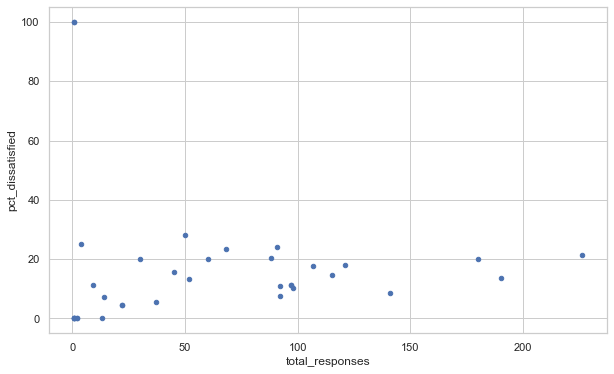

In [164]:
safety_by_zip.plot(kind = 'scatter',
                  x ='total_responses',
                  y = 'pct_dissatisfied',
                  figsize = (10,6));

In [166]:
query = '''
SELECT *
FROM info
JOIN general_services
ON info.id = general_services.id
'''

safety_sidewalks = pd.read_sql(query, conn)

In [167]:
safety_sidewalks.head(2)

,Id,Period,Date,ZIP Code,Quality of Life,Overall Feeling of Safety,Neighborhood Safety,Neighborhood Appearance,Nashville as Residence,Nashville as Place to Raise Children,...,Bicycle Infrastructure,Trash Service,Curbside Recycling,Drop-off Recycling,Street Lighting,hubNashville (311),Program Information Availability,Nashville.gov,Metro Video Programming,Metro Social Media
0,1,2018Q2,07/16/2018,37208,Neutral,Neutral,Neutral,Satisfied,Neutral,Good,...,Satisfied,Satisfied,Neutral,Neutral,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied
1,2,2018Q2,07/16/2018,37211,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,...,Dissatisfied,Very Satisfied,Very Dissatisfied,Neutral,Neutral,Don't Know,Satisfied,Don't Know,Don't Know,Satisfied


In [168]:
safety_sidewalks = safety_sidewalks[['ZIP Code', 'Streets and Sidewalks - Overall']]

In [170]:
safety_sidewalks

,ZIP Code,Streets and Sidewalks - Overall
0,37208,Satisfied
1,37211,Dissatisfied
2,37208,Dissatisfied
3,37203,Satisfied
4,37138,Dissatisfied
...,...,...
2166,37203,Dissatisfied
2167,37027,Satisfied
2168,37209,Dissatisfied
2169,37217,Very Dissatisfied


In [171]:
safety_sidewalks.columns = ['zipcode', 'streets_overall']

In [172]:
safety_sidewalks.head(1)

,zipcode,streets_overall
0,37208,Satisfied


In [174]:
streets_safety = pd.merge( safety_sidewalks, streets_median, how = 'outer', on = 'zipcode')

In [175]:
streets_safety.head()

,zipcode,streets_overall,resolution_time_hours
0,37208.0,Satisfied,80.283333
1,37208.0,Dissatisfied,80.283333
2,37208.0,Neutral,80.283333
3,37208.0,Dissatisfied,80.283333
4,37208.0,Dissatisfied,80.283333


In [176]:
streets_safety.info

<bound method DataFrame.info of       zipcode streets_overall  resolution_time_hours
0     37208.0       Satisfied              80.283333
1     37208.0    Dissatisfied              80.283333
2     37208.0         Neutral              80.283333
3     37208.0    Dissatisfied              80.283333
4     37208.0    Dissatisfied              80.283333
...       ...             ...                    ...
2172  37086.0             NaN              43.233333
2173  37122.0             NaN              30.214306
2174  37152.0             NaN               1.766667
2175  37213.0             NaN              43.048333
2176  37232.0             NaN              40.416667

[2177 rows x 3 columns]>

In [177]:
streets_dissatisfied = streets_safety.loc[streets_safety['streets_overall'].isin(['Dissatisfied','Very Dissatisfied'])]

In [183]:
streets_dissatisfied.head()

,zipcode,streets_overall,resolution_time_hours
1,37208.0,Dissatisfied,80.283333
3,37208.0,Dissatisfied,80.283333
4,37208.0,Dissatisfied,80.283333
5,37208.0,Dissatisfied,80.283333
7,37208.0,Dissatisfied,80.283333


In [185]:
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start=12)

In [186]:
nash_map